In [15]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from linformer import Linformer
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
from vit_pytorch.efficient import ViT
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import torch.utils.data as data
import torchvision
from torchvision.transforms import ToTensor
torch.cuda.is_available()

True

In [2]:
!nvidia-smi

Unable to determine the device handle for GPU 0000:B1:00.0: Unknown Error


In [16]:
# Hyperparameters:
batch_size = 8
epochs = 20
lr = 3e-5
gamma = 0.7
seed = 142
IMG_SIZE = 512
patch_size = 16
num_classes = 2

In [17]:
# Tensor Transforms (with Augmentation) and Pytorch Preprocessing:
train_ds = torchvision.datasets.ImageFolder("E:\\JK\\Vt\\dataset_vit\\train", transform=ToTensor())
valid_ds = torchvision.datasets.ImageFolder("E:\\JK\\Vt\dataset_vit\\val", transform=ToTensor())
test_ds = torchvision.datasets.ImageFolder("E:\\JK\\Vt\\dataset_vit\\test", transform=ToTensor())

In [18]:
# Data Loaders:
train_loader = data.DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=4)
valid_loader = data.DataLoader(valid_ds, batch_size=batch_size, shuffle=True,  num_workers=4)
test_loader  = data.DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=4)

In [19]:
# Training device:
device = 'cuda'

# Linear Transformer:
efficient_transformer = Linformer(dim=512, seq_len=64+1, depth=12, heads=8, k=64)

# Vision Transformer Model:
model = ViT(dim=512, image_size=512, patch_size=patch_size, num_classes=num_classes, transformer=efficient_transformer, channels=3).to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# Learning Rate Scheduler for Optimizer:
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [20]:
# Training:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

        with torch.no_grad():
            epoch_val_accuracy = 0
            epoch_val_loss = 0

        for data, label in valid_loader:

            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )

  0%|          | 0/180 [00:00<?, ?it/s]

AssertionError: the sequence length of the key / values must be 65 - 1025 given

In [8]:
# Save Model:
PATH = "epochs"+"_"+str(epochs)+"_"+"img"+"_"+str(IMG_SIZE)+"_"+"patch"+"_"+str(patch_size)+"_"+"lr"+"_"+str(lr)+".pt"
torch.save(model.state_dict(), PATH)

In [16]:
# load saved model:
#PATH = "epochs"+"_"+str(epochs)+"_"+"img"+"_"+str(IMG_SIZE)+"_"+"patch"+"_"+str(patch_size)+"_"+"lr"+"_"+str(lr)+".pt"
PATH='E:\\JK\\Vt\\epochs_10_img_128_patch_16_lr_3e-05.pt'
efficient_transformer = Linformer(dim=128, seq_len=49+1, depth=12, heads=8, k=64)
model = ViT(image_size=224, patch_size=32, num_classes=2, dim=128 ,transformer=efficient_transformer, channels=3)
model.load_state_dict(torch.load(PATH))

RuntimeError: Error(s) in loading state_dict for ViT:
	size mismatch for pos_embedding: copying a param with shape torch.Size([1, 65, 128]) from checkpoint, the shape in current model is torch.Size([1, 50, 128]).
	size mismatch for to_patch_embedding.1.weight: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([3072]).
	size mismatch for to_patch_embedding.1.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([3072]).
	size mismatch for to_patch_embedding.2.weight: copying a param with shape torch.Size([128, 768]) from checkpoint, the shape in current model is torch.Size([128, 3072]).
	size mismatch for transformer.net.layers.0.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.0.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.1.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.1.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.2.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.2.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.3.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.3.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.4.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.4.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.5.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.5.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.6.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.6.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.7.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.7.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.8.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.8.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.9.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.9.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.10.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.10.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.11.0.fn.proj_k: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).
	size mismatch for transformer.net.layers.11.0.fn.proj_v: copying a param with shape torch.Size([65, 64]) from checkpoint, the shape in current model is torch.Size([50, 64]).

In [22]:
# Performance on Valid/Test Data
def overall_accuracy(model, test_loader, criterion):

    '''
    Model testing

    Args:
        model: model used during training and validation
        test_loader: data loader object containing testing data
        criterion: loss function used

    Returns:
        test_loss: calculated loss during testing
        accuracy: calculated accuracy during testing
        y_proba: predicted class probabilities
        y_truth: ground truth of testing data
    '''

    y_proba = []
    y_truth = []
    test_loss = 0
    total = 0
    correct = 0
    for data in tqdm(test_loader):
        X, y = data[0].to('cpu'), data[1].to('cpu')
        output = model(X)
        test_loss += criterion(output, y.long()).item()
        for index, i in enumerate(output):
            y_proba.append(i[1])
            y_truth.append(y[index])
            if torch.argmax(i) == y[index]:
                correct+=1
            total+=1

    accuracy = correct/total

    y_proba_out = np.array([float(y_proba[i]) for i in range(len(y_proba))])
    y_truth_out = np.array([float(y_truth[i]) for i in range(len(y_truth))])

    return test_loss, accuracy, y_proba_out, y_truth_out


loss, acc, y_proba, y_truth = overall_accuracy(model, test_loader, criterion = nn.CrossEntropyLoss())


print(f"Accuracy: {acc}")

print(pd.value_counts(y_truth))

  0%|          | 0/23 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper__native_layer_norm)

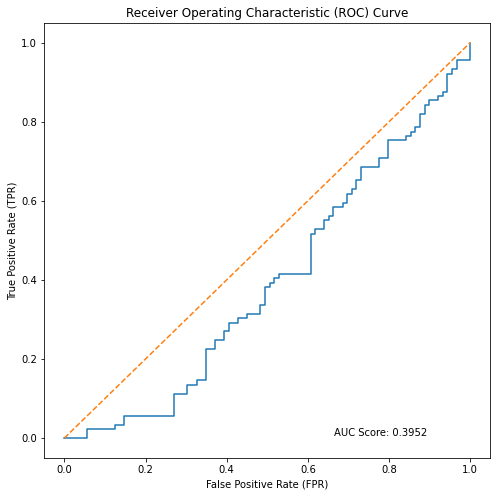

In [13]:
# Plot ROC curve:

def plot_ROCAUC_curve(y_truth, y_proba, fig_size):

    '''
    Plots the Receiver Operating Characteristic Curve (ROC) and displays Area Under the Curve (AUC) score.

    Args:
        y_truth: ground truth for testing data output
        y_proba: class probabilties predicted from model
        fig_size: size of the output pyplot figure

    Returns: void
    '''

    fpr, tpr, threshold = roc_curve(y_truth, y_proba)
    auc_score = roc_auc_score(y_truth, y_proba)
    txt_box = "AUC Score: " + str(round(auc_score, 4))
    plt.figure(figsize=fig_size)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'--')
    plt.annotate(txt_box, xy=(0.65, 0.05), xycoords='axes fraction')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
#     plt.savefig('ROC.png')
plot_ROCAUC_curve(y_truth, y_proba, (8, 8))

<AxesSubplot:>

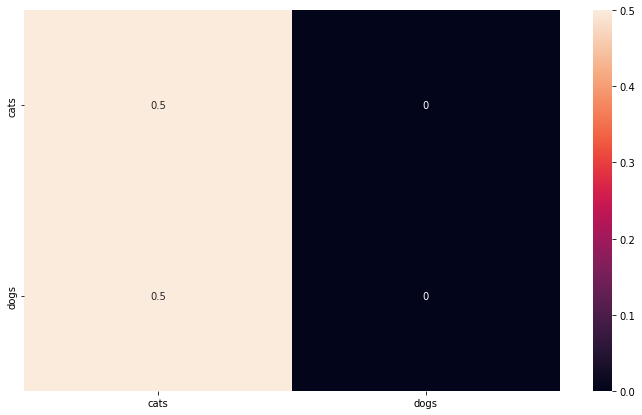

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

net = model
# iterate over test data
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('cats', 'dogs')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
# plt.savefig('cm.png')

In [ ]:
# Inference on Single Images (cats-dogs):
test_image = "new_cat_image.jpg"
test_image_null = "new_dog_image.png"
image = Image.open(test_image)
image_null = Image.open(test_image_null)

# Define tensor transform and apply it:
data_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
image_t = data_transform(image).unsqueeze(0)
image_null_t = data_transform(image_null).unsqueeze(0)

# Labels:
for inputs, labels in test_loader:
        labels = labels.data.cpu().numpy()

# Prediction:
out_cat = model(image_t)
out_dog= model(image_null_t)
print("predicted cat tensor:", out_cat)
print("predicted dog tensor:", out_dog)
print("")
# Print:
if(labels[out_cat.argmax()]== 0):
    print("smoke")
else:
    print("else")

# Show Image:
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.show()
# Print:
if(labels[out_dog.argmax()]== 0):
    print("cat")
else:
    print("dog")

# Show Image Null:
plt.figure(figsize=(2, 2))
plt.imshow(image_null)
plt.show()

In [2]:
#E:\JK\Vt\dataset_vit - Copy

import cv2
import os

def resize_images(folder_path, new_width, new_height):
  """Resizes images in a folder and its subfolders to a new resolution.

  Args:
    folder_path: Path to the folder containing the images.
    new_width: The desired width of the resized images.
    new_height: The desired height of the resized images.
  """
  for dirpath, dirnames, filenames in os.walk(folder_path):
    for filename in filenames:
      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(dirpath, filename)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (new_width, new_height))
        cv2.imwrite(image_path, resized_image)

# Set the folder path and desired resolution
folder_path = "E:\JK\Vt\dataset_vit - Copy"
new_width = 512
new_height = 512

# Resize images
resize_images(folder_path, new_width, new_height)

print("Images resized successfully!")
print("1")


Images resized successfully!
1
